## **Capstone Final Review**

**Implementation of AI for understanding Supplier Disruption**


Group members - 
<br>
<ul>
<li>Aadrika - 12110055 
<li>Manjari Shrivastava - 12110082 
<li>Shashank Jha - 12110023
<li>Vinayak Burji - 12110056
</ul>




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
file = "/content/drive/My Drive/DataCoSupplyChainDataset.csv"

In [ ]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [ ]:
dataco = pd.read_csv(file,encoding='ISO-8859-1')
dataco.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
dataco.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Dropping Order Zipcode and Product Description as they contain nulls.

In [ ]:
df = dataco.drop(['Order Zipcode', 'Product Description',], axis=1)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.000000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.979980,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.490000,104.379997,163.990005,247.399994,1939.989990
Late_delivery_risk,180519.0,0.548291,0.497664,0.000000,0.000000,1.000000,1.000000,1.000000
Category Id,180519.0,31.851451,15.640064,2.000000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.000000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.000000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.000000,4.000000,5.000000,7.000000,12.000000
Latitude,180519.0,29.719955,9.813646,-33.937553,18.265432,33.144863,39.279617,48.781933


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [ ]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


**Exploratory Data Analysis**

***Assessing Correlation***

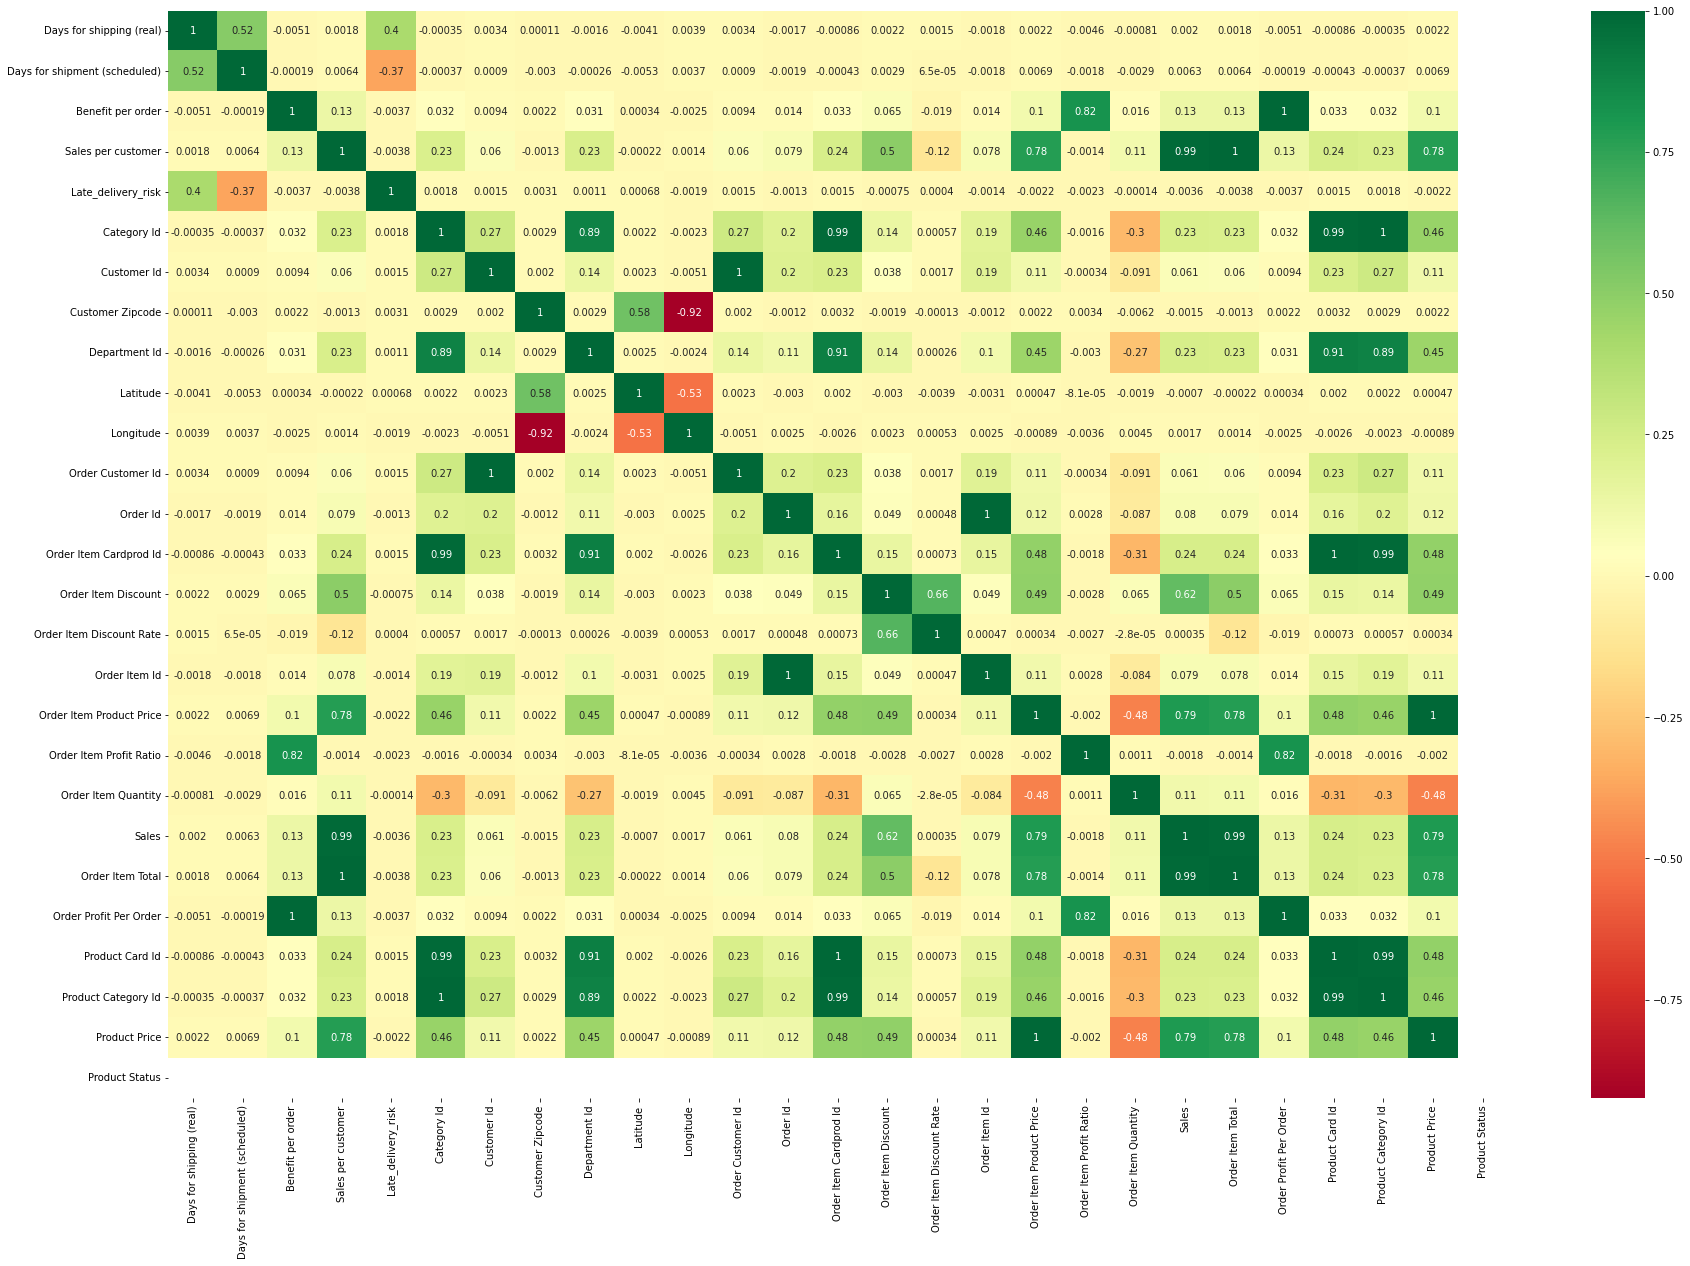

In [ ]:
corrmap = df.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sn.heatmap(df[top].corr(),annot=True,cmap="RdYlGn");

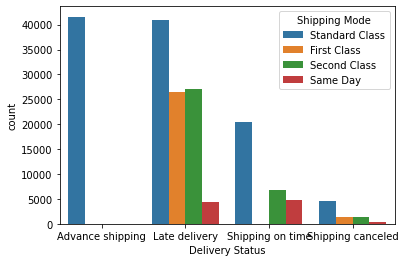

In [ ]:
sn.countplot(x ='Delivery Status', hue = "Shipping Mode", data = df)

***Sales by market***

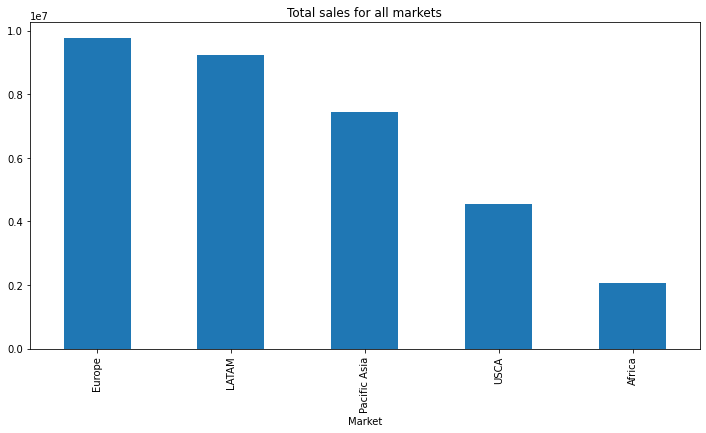

In [ ]:
market = df.groupby('Market') #Grouping by market

plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")

***Late Delivered Products***

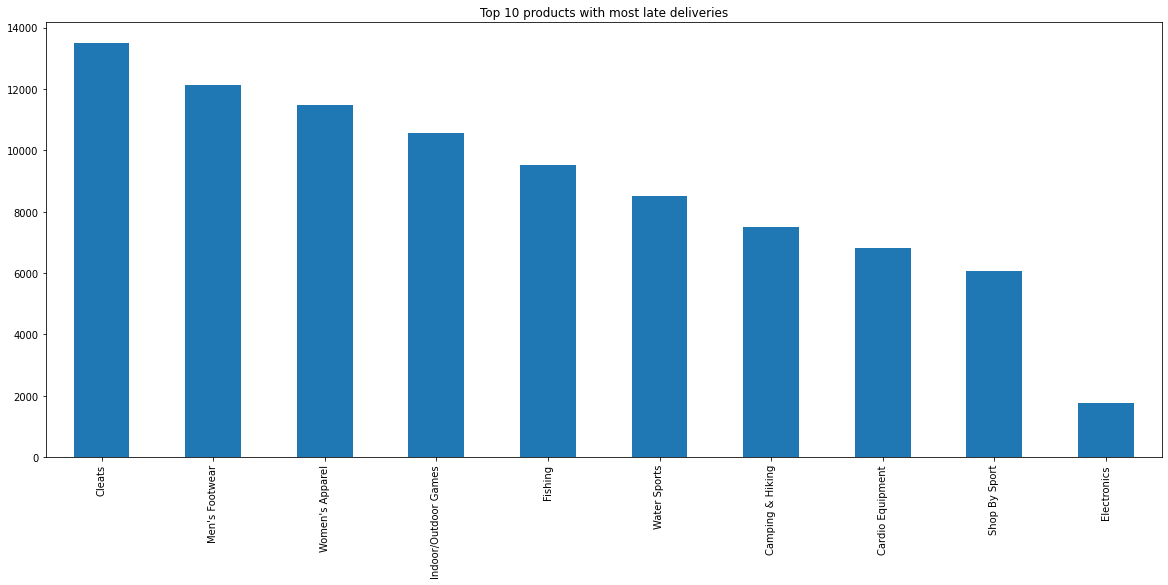

In [ ]:
#Filtering columns with late delivery status
late_delivery = df[(df['Delivery Status'] == 'Late delivery')]
#Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

***Products with High Loss and Markets with High Loss***

Total revenue lost with orders -3883547.345768667


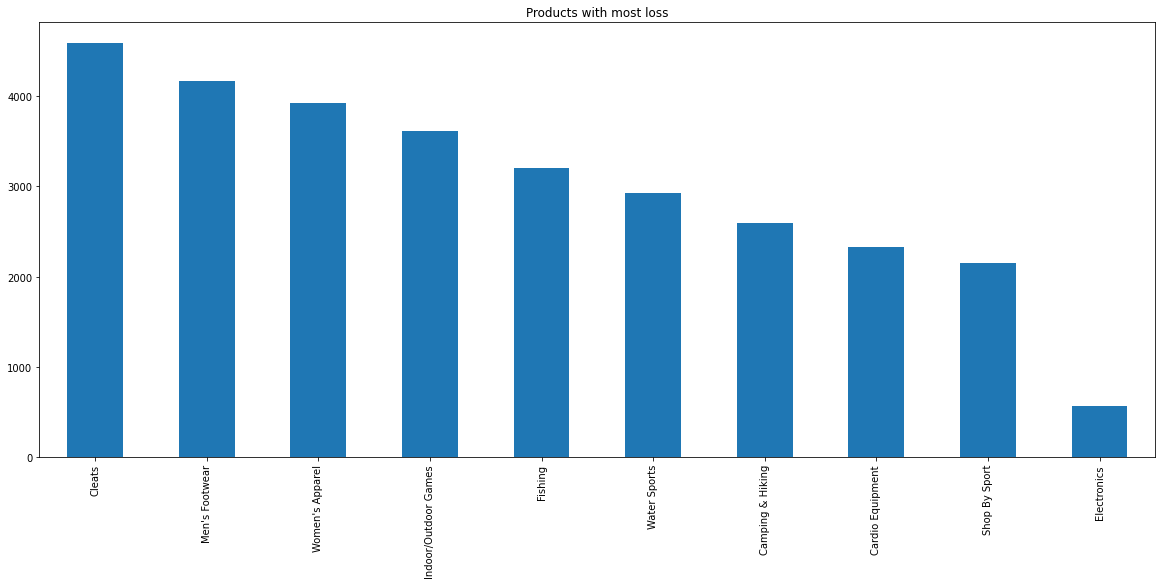

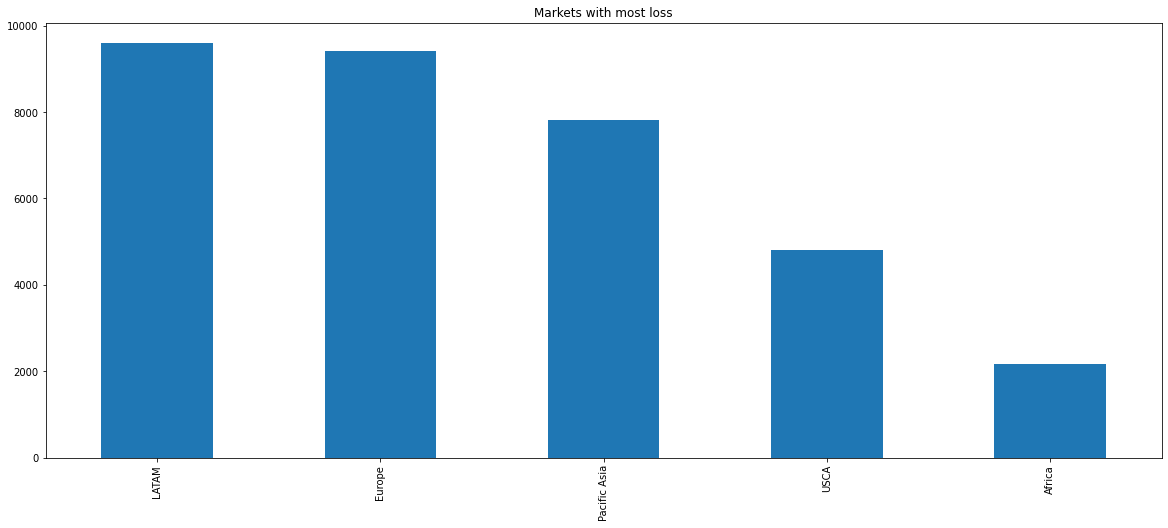

In [ ]:
loss = df[(df['Benefit per order']<0)]
#Plotting top 10 products with most loss
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Products with most loss")
plt.figure(2)
loss['Order City'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Cities with most loss")

loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Markets with most loss")
#Sum of total sales which are lost
print('Total revenue lost with orders',loss['Benefit per order'].sum())

***Assessing delivery status***

In [ ]:
df['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

Currently, 55% of the total deliveries are late deliveries.

In [ ]:
df['Shipping Mode'].value_counts()

Standard Class    107752
Second Class       35216
First Class        27814
Same Day            9737
Name: Shipping Mode, dtype: int64

99% of the deliveries are shipped using standard class whereas only 0.06% of the deliveries were same day deliveries.

***Late Delivery Order Status***

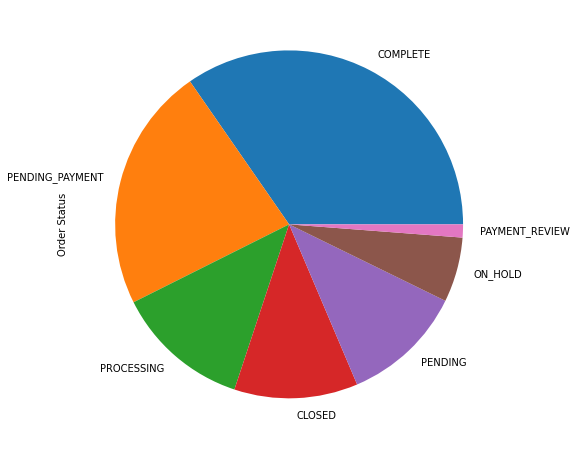

In [ ]:
xyz1 = df[(df['Delivery Status'] == "Shipping on time")]
xyz1['Order Status'].value_counts().plot.pie(figsize=(20,8))

***Shipping Mode Distribution***

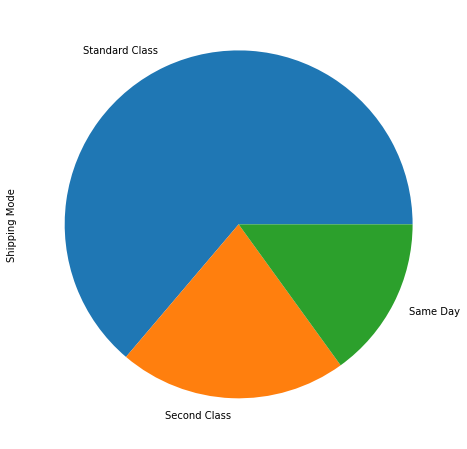

In [ ]:
xyz1['Shipping Mode'].value_counts().plot.pie(figsize=(20,8))

Standard Class
0    66729
1    41023
Name: Late_delivery_risk, dtype: int64
First Class
1    26513
0     1301
Name: Late_delivery_risk, dtype: int64
Second Class
1    26987
0     8229
Name: Late_delivery_risk, dtype: int64
Same Day
0    5283
1    4454
Name: Late_delivery_risk, dtype: int64


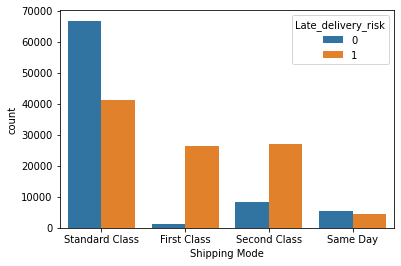

In [ ]:
fig = sn.countplot(x='Shipping Mode', hue='Late_delivery_risk',  data=df)


stc = df[(df['Shipping Mode'] == 'Standard Class')]
print("Standard Class")
print(stc['Late_delivery_risk'].value_counts())

fc = df[(df['Shipping Mode'] == 'First Class')]
print("First Class")
print(fc['Late_delivery_risk'].value_counts())

sc = df[(df['Shipping Mode'] == 'Second Class')]
print("Second Class")
print(sc['Late_delivery_risk'].value_counts())

sd = df[(df['Shipping Mode'] == 'Same Day')]
print("Same Day")
print(sd['Late_delivery_risk'].value_counts())

fig

 In relative terms, in both the First and Second classes, the late delivery risk is more likely. The late delivery risk is 95% in first class and 77% in the second class. Whereas in the standard class, the risk of late delivery is ~38%. This is also lower than the Same Day shipping mode where the risk is ~46%. 

***Customer Segment Distribution***

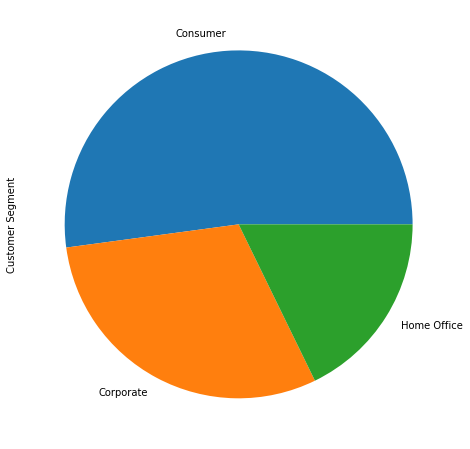

In [ ]:
xyz1['Customer Segment'].value_counts().plot.pie(figsize=(20,8))

~52% is the Consumer Segment, 30% is the Corporate Segment and the rest ~18% is the Home Office segment.

1    29982
0    24807
Name: Late_delivery_risk, dtype: int64

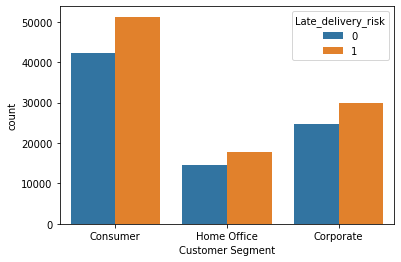

In [ ]:
fig = sn.countplot(x='Customer Segment', hue='Late_delivery_risk',  data=df)
fig

csc = df[(df['Customer Segment'] == 'Consumer')]
csc['Late_delivery_risk'].value_counts()

h = df[(df['Customer Segment'] == 'Home Office')]
h['Late_delivery_risk'].value_counts()

c = df[(df['Customer Segment'] == 'Corporate')]
c['Late_delivery_risk'].value_counts()

For all the customer segments, the late delivery risk is between 54% and 55%.

***Shipping Mode distribution basis on-time delivery***

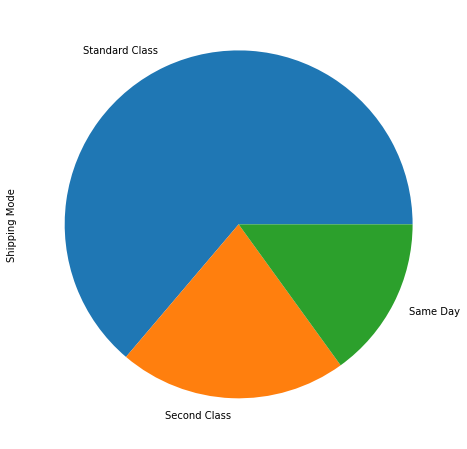

In [ ]:
xyz3 = df[(df['Delivery Status'] == "Shipping on time")]
xyz3['Shipping Mode'].value_counts().plot.pie(figsize=(20,8))

***Order of late delivery where stock is not available***

In [ ]:
#Filtering orders with late delivery risk
xyz4 = df[(df['Delivery Status'] == "Late delivery")]
#Filtering late delivered orders
xyz5 = df[(df['Product Status'] == 0)]
count1=xyz1['Order Country'].value_counts().nlargest(10)
print(count1)


Estados Unidos    4501
México            2312
Francia           2264
Australia         1644
Alemania          1599
Brasil            1411
Reino Unido       1320
China              985
Italia             864
India              784
Name: Order Country, dtype: int64


***Countries with Advanced Shipping delivery status***

In [ ]:
xyz2 = df[(df['Delivery Status'] == "Advance shipping")]
count2=xyz2['Order Country'].value_counts().nlargest(10)
print(count2)

Estados Unidos    5549
México            3047
Francia           3007
Alemania          2172
Australia         1879
Brasil            1837
Reino Unido       1769
China             1391
Italia            1227
India             1121
Name: Order Country, dtype: int64


**Inventory Management using ABC analysis**

In [ ]:
Total_Products=df["Product Name"].nunique()
print("Total Number of products: "+f"{Total_Products}")

Total Number of products: 118


In [ ]:
Revenue_ABC=df.groupby(["Department Name","Product Name"]).agg(Total_Revenue=("Order Item Total","sum")).sort_values(by="Total_Revenue",ascending=False).reset_index()
Revenue_ABC["sum"]=Revenue_ABC["Total_Revenue"].cumsum()
Revenue_ABC["percentage"]=Revenue_ABC["sum"]/Revenue_ABC["Total_Revenue"].sum()*100
Revenue_ABC["per"]=Revenue_ABC["percentage"]-Revenue_ABC["percentage"].shift(1)
Revenue_ABC.loc[0,"per"]=Revenue_ABC["percentage"][0]

In [ ]:
def ABC(data):
    if data["percentage"]<=75:
        return "A"
    elif data["percentage"]>75 and data["percentage"]<=95:
        return "B"
    elif data["percentage"]>95:
        return "C"

Revenue_ABC["ABC_Revenue"]=Revenue_ABC.apply(ABC,axis=1)

In [ ]:
Bar_graph_Abc=Revenue_ABC[["ABC_Revenue","Product Name","Total_Revenue"]].groupby("ABC_Revenue").agg(Revenue=("Total_Revenue","sum"),count=("Product Name","count"))

In [ ]:
from plotly import graph_objects as go

Bar_graph_Abc
fig2=go.Figure(go.Bar(x=Bar_graph_Abc.index,
                      y=Bar_graph_Abc["Revenue"],
                     hovertemplate ="%{label}<br>Revenue:%{value}",
                     texttemplate = "Revenue<br>%{value}",
                     marker_color=["lightblue","lightgreen","red"],
                     showlegend=False))
fig2.add_trace(                          
    go.Scatter(                          
    x=Bar_graph_Abc.index,
    y=Bar_graph_Abc["count"],
    name="Number Of Products",
    mode='lines',                                                       
    line = dict(color='orange', width=3),   
    yaxis="y2",
    marker_line_width = 0
    ))

fig2.update_layout(
                   title="Revenue Generated By Products in Different ABC Segments",
                   xaxis=dict(title="Segment" ),
                   yaxis=dict(title="Revenue",showgrid=False),
                   yaxis2=dict(title="Number Of Products", anchor="x", overlaying="y",side="right",dtick=10),
                   legend = dict(x = 1.05, y = 1))
fig2.show()


**Insights for Inventory Management of DataCo Global**


The total revenue is ~$33.07M.
1. Category A is where we generate maximum revenue.From the graph, it is evident that out of 118, only 6 products contribute to ~69% of revenue. DataCo Global must keep these on priority
2. Category B contributes to 25% of the revenue.There are 17 products in this category, DataCo must manage optimum levels of these products as well.
3. Category C contains rest of the 95 products. To reduce holding costs, cuts could be made in this category. 


Feature Engineering

In [ ]:
df['TotalPrice'] = df['Order Item Quantity'] * df['Order Item Total']
df['fraud'] = np.where(df['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
df['late_delivery']=np.where(df['Delivery Status'] == 'Late delivery', 1, 0)
df['order_year']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_week_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour
df['order_month_year'] = pd.to_datetime(df['order date (DateOrders)']).dt.to_period('M')
df['shipping_year']= pd.DatetimeIndex(df['shipping date (DateOrders)']).year
df['shipping_month'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).month
df['shipping_week_day'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).weekday
df['shipping_hour'] = pd.DatetimeIndex(df['shipping date (DateOrders)']).hour
df['shipping_month_year'] = pd.to_datetime(df['shipping date (DateOrders)']).dt.to_period('M')

In [ ]:
df2 = df[['Type','Customer Country','Market','Order Country','order_week_day','order_month','order_year','shipping_week_day',
          'shipping_month','shipping_year','Shipping Mode','fraud','late_delivery']]

In [ ]:
df2.dtypes

Type                 object
Customer Country     object
Market               object
Order Country        object
order_week_day        int64
order_month           int64
order_year            int64
shipping_week_day     int64
shipping_month        int64
shipping_year         int64
Shipping Mode        object
fraud                 int64
late_delivery         int64
dtype: object

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df2['Type'] = le.fit_transform(df2['Type'])
df2['Customer Country']  = le.fit_transform(df2['Customer Country'])
df2['Market'] = le.fit_transform(df2['Market'])
df2['Order Country'] = le.fit_transform(df2['Order Country'])
df2['Shipping Mode'] = le.fit_transform(df2['Shipping Mode'])
df2['late_delivery'] = le.fit_transform(df2['late_delivery']) 

df2.dtypes

Type                 int64
Customer Country     int64
Market               int64
Order Country        int64
order_week_day       int64
order_month          int64
order_year           int64
shipping_week_day    int64
shipping_month       int64
shipping_year        int64
Shipping Mode        int64
fraud                int64
late_delivery        int64
dtype: object

Creating train test split

In [ ]:
df2.reset_index(drop=True,inplace=True)
train = df2.loc[:int(df.shape[0]*0.8),:]
test = df2.loc[int(df.shape[0]*0.8):,:]

In [ ]:
train

,Type,Customer Country,Market,Order Country,order_week_day,order_month,order_year,shipping_week_day,shipping_month,shipping_year,Shipping Mode,fraud,late_delivery
0,1,1,3,70,2,1,2018,5,2,2018,3,0,0
1,3,1,3,69,5,1,2018,3,1,2018,3,0,1
2,0,0,3,69,5,1,2018,2,1,2018,3,0,0
3,1,0,3,8,5,1,2018,1,1,2018,3,0,0
4,2,1,3,8,5,1,2018,0,1,2018,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144411,3,1,1,120,6,7,2015,0,7,2015,1,1,0
144412,2,1,1,9,6,7,2015,0,7,2015,1,0,1
144413,1,1,1,25,6,7,2015,0,7,2015,1,0,1
144414,0,0,1,25,6,7,2015,5,8,2015,3,0,1


In [ ]:
test

,Type,Customer Country,Market,Order Country,order_week_day,order_month,order_year,shipping_week_day,shipping_month,shipping_year,Shipping Mode,fraud,late_delivery
144415,1,1,1,25,6,7,2015,4,7,2015,3,0,1
144416,3,1,1,53,6,7,2015,6,7,2015,1,0,0
144417,3,0,1,53,6,7,2015,6,7,2015,1,0,0
144418,3,0,1,53,6,7,2015,6,7,2015,1,0,0
144419,1,0,1,53,6,7,2015,6,7,2015,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,0,3,31,5,1,2016,2,1,2016,3,0,0
180515,1,0,3,77,5,1,2016,1,1,2016,2,0,1
180516,3,0,3,8,4,1,2016,2,1,2016,3,0,1
180517,2,1,3,8,4,1,2016,0,1,2016,3,0,0


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [ ]:
y = df2['late_delivery']
x = df2.loc[:, df2.columns != 'late_delivery']

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

In [ ]:
y_train.value_counts()

1    79369
0    65046
Name: late_delivery, dtype: int64

In [ ]:
y_test.value_counts()

1    19608
0    16496
Name: late_delivery, dtype: int64

The ratio of late and on-time delivery is fairly uniformly distributed (55% & 45%)

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
def classifiermodel(model_l,x_train, x_test,y_train,y_test):
    model_l=model_l.fit(x_train,y_train) # Fitting train data for predection of late delivery
    y_pred=model_l.predict(x_test)  
    accuracy_l=accuracy_score(y_pred, y_test) #Accuracy for prediction of late delivery
    recall_l=recall_score(y_pred, y_test)# Recall score for predection of late delivery
    conf_l=confusion_matrix(y_test, y_pred)#predection of late delivery
    f1_l=f1_score(y_test, y_pred)#predection of late delivery
    print('Model paramters used are :',model_l)
    print('Accuracy of late delivery status is:', (accuracy_l)*100,'%')
    print('Recall score of late delivery status is:', (recall_l)*100,'%')
    print('Conf Matrix of late delivery status is: \n',(conf_l))
    print('F1 score of late delivery status is:', (f1_l)*100,'%')

In [ ]:
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge,LinearRegression,LogisticRegression,ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingRegressor,BaggingClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc

**Logistic Regression**

In [ ]:
model_l = LogisticRegression(solver='lbfgs',random_state=0) #the classification model
#Giving inputs to the defined function
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : LogisticRegression(random_state=0)
Accuracy of late delivery status is: 70.54896964325282 %
Recall score of late delivery status is: 76.45775602853605 %
Conf Matrix of late delivery status is: 
 [[12503  3993]
 [ 6640 12968]]
F1 score of late delivery status is: 70.92345976099975 %


**Gaussian Naive Bayes**

In [ ]:
model_l = GaussianNB()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : GaussianNB()
Accuracy of late delivery status is: 56.52836250830933 %
Recall score of late delivery status is: 55.54202192448234 %
Conf Matrix of late delivery status is: 
 [[  801 15695]
 [    0 19608]]
F1 score of late delivery status is: 71.41738449490995 %


**Support Vector Machines**

In [ ]:
model_l = svm.LinearSVC()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : LinearSVC()
Accuracy of late delivery status is: 70.54896964325282 %
Recall score of late delivery status is: 76.45775602853605 %
Conf Matrix of late delivery status is: 
 [[12503  3993]
 [ 6640 12968]]
F1 score of late delivery status is: 70.92345976099975 %


**Nearest Neighbour Classification**

In [ ]:
model_l = KNeighborsClassifier(n_neighbors=1)
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : KNeighborsClassifier(n_neighbors=1)
Accuracy of late delivery status is: 98.23011300686905 %
Recall score of late delivery status is: 98.43231374151048 %
Conf Matrix of late delivery status is: 
 [[16189   307]
 [  332 19276]]
F1 score of late delivery status is: 98.36952361511571 %


**LDA**

In [ ]:
model_l = LinearDiscriminantAnalysis()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 70.53789053844449 %
Recall score of late delivery status is: 76.43972885352196 %
Conf Matrix of late delivery status is: 
 [[12499  3997]
 [ 6640 12968]]
F1 score of late delivery status is: 70.91570284089356 %


**Random Forest Classifier**

In [ ]:
model_l = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 87.31719477066252 %
Recall score of late delivery status is: 88.11178171121368 %
Conf Matrix of late delivery status is: 
 [[14152  2344]
 [ 2235 17373]]
F1 score of late delivery status is: 88.35600762873491 %


**eXtreme Gradient Boosting Classification**

In [ ]:
model_l = xgb.XGBClassifier()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : XGBClassifier()
Accuracy of late delivery status is: 87.30611566585421 %
Recall score of late delivery status is: 86.48438638240007 %
Conf Matrix of late delivery status is: 
 [[13713  2783]
 [ 1800 17808]]
F1 score of late delivery status is: 88.59921888604194 %


**Decision tree classification**

In [ ]:
model_l = tree.DecisionTreeClassifier()
classifiermodel(model_l,x_train, x_test,y_train,y_test)

Model paramters used are : DecisionTreeClassifier()
Accuracy of late delivery status is: 99.12752049634389 %
Recall score of late delivery status is: 99.26962561928597 %
Conf Matrix of late delivery status is: 
 [[16353   143]
 [  172 19436]]
F1 score of late delivery status is: 99.19616199249752 %


In [ ]:
classification_data = {'Classification Model':  ['Logistic Regression','Gaussian Naive bayes','Support Vector Machines','Nearest Neighbour',
                                'Linear Discriminant Analysis','Random Forest','eExtreme gradient boosting','Decision tree'],
        'Accuracy Score for Late Delivery':       [70.54,56.52,70.54,98.23,70.53,87.31,87.30,99.11],
        'Recall Score for Late Delivery':         [76.45,55.54,76.45,98.43,76.43,88.11,86.48,99.26],
        'F1 Score for Late Delivery':             [70.92,71.41,70.92,98.36,70.91,88.35,88.59,99.18] }
#Creating data frame with Column Names
classification_comparison = pd.DataFrame (classification_data, columns = ['Classification Model','Accuracy Score for Late Delivery','Recall Score for Late Delivery','F1 Score for Late Delivery'])

classification_comparison

,Classification Model,Accuracy Score for Late Delivery,Recall Score for Late Delivery,F1 Score for Late Delivery
0,Logistic Regression,70.54,76.45,70.92
1,Gaussian Naive bayes,56.52,55.54,71.41
2,Support Vector Machines,70.54,76.45,70.92
3,Nearest Neighbour,98.23,98.43,98.36
4,Linear Discriminant Analysis,70.53,76.43,70.91
5,Random Forest,87.31,88.11,88.35
6,eExtreme gradient boosting,87.30,86.48,88.59
7,Decision tree,99.11,99.26,99.18


**Hyper Parameter Tuning**

In [ ]:
dt = tree.DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 2.06 s, sys: 738 ms, total: 2.79 s
Wall time: 42.2 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.184429,0.023630,0.009439,0.000788,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.69358,0.696543,0.688539,0.691521,0.692546,0.002922,41
1,0.162724,0.003303,0.009911,0.000557,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.69358,0.696543,0.688539,0.691521,0.692546,0.002922,41
2,0.174870,0.015670,0.009357,0.000712,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.69358,0.696543,0.688539,0.691521,0.692546,0.002922,41
3,0.165180,0.003384,0.009230,0.000095,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.69358,0.696543,0.688539,0.691521,0.692546,0.002922,41
4,0.163978,0.006220,0.009343,0.000106,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.69358,0.696543,0.688539,0.691521,0.692546,0.002922,41


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
20,0.583367,0.042798,0.014587,0.000663,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.977731,0.967898,0.978673,0.954020,0.969581,0.009925,1
45,0.588418,0.050577,0.015066,0.001426,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.983243,0.963771,0.984739,0.941972,0.968431,0.017372,2
46,0.568644,0.048096,0.015573,0.002364,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.980307,0.961666,0.983575,0.934216,0.964941,0.019609,3
21,0.567470,0.038488,0.014414,0.000614,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.973576,0.966375,0.975571,0.943440,0.964740,0.012765,4
22,0.551697,0.041510,0.014015,0.000424,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.965129,0.957789,0.969671,0.927762,0.955088,0.016336,5


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

After hyper parameter tuning, the best decision tree classifier will have the following decision hyper parameter.


1.   Max Depth - 20
2.   Min number of leaf nodes - 5
3.   Decision criteria - Gini



**Statistical Hypothesis tests : To Verify if the models have the same mean performance and any observed difference in the mean accuracies is probably a statistical fluke**


The 5x2cv paired t test is a procedure for comparing the performance of two models (classifiers or regressors) that was proposed by Dietterich to address shortcomings in other methods such as the resampled paired t test (see paired_ttest_resampled) and the k-fold cross-validated paired t test.

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv


t, p = paired_ttest_5x2cv(estimator1= GaussianNB(), estimator2=LogisticRegression(solver='lbfgs',random_state=0), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.000, t-Statistic: -42.900


Since p<α(0.05), we can reject the null hypothesis and may conclude that the performance of the two algorithms is  significantly different.

In [ ]:
t, p = paired_ttest_5x2cv(estimator1= svm.LinearSVC(), estimator2=LogisticRegression(solver='lbfgs',random_state=0), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.188, t-Statistic: 1.524


Since p>α(0.05), we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.

In [ ]:
t, p = paired_ttest_5x2cv(estimator1= KNeighborsClassifier(n_neighbors=1), estimator2=LogisticRegression(solver='lbfgs',random_state=0), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.000, t-Statistic: 171.273


Since p<α(0.05), we can reject the null hypothesis and may conclude that the performance of the two algorithms is significantly different.

In [ ]:
t, p = paired_ttest_5x2cv(estimator1= RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0), estimator2=LogisticRegression(solver='lbfgs',random_state=0), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.000, t-Statistic: 9.191


Since p<α(0.05), we can reject the null hypothesis and may conclude that the performance of the two algorithms is significantly different.

In [ ]:
t, p = paired_ttest_5x2cv(estimator1= xgb.XGBClassifier(), estimator2=LogisticRegression(solver='lbfgs',random_state=0), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.055, t-Statistic: 2.487


Since p>α(0.05), we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.

In [ ]:
t, p = paired_ttest_5x2cv(estimator1= tree.DecisionTreeClassifier(), estimator2=LogisticRegression(solver='lbfgs',random_state=0), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.000, t-Statistic: 23.066


In [ ]:
t, p = paired_ttest_5x2cv(estimator1= tree.DecisionTreeClassifier(), estimator2=xgb.XGBClassifier(), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.690, t-Statistic: 0.423


In [ ]:
t, p = paired_ttest_5x2cv(estimator1= tree.DecisionTreeClassifier(), estimator2=svm.LinearSVC(), X=x_test, y=y_test, scoring='accuracy', random_seed=1)
# summarize
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))

P-value: 0.000, t-Statistic: 22.966


Since p<α(0.05), we can reject the null hypothesis and may conclude that the performance of the two algorithms is significantly different.

We can conclude that we can use either of the models from the list given below for classification problem in or case as all the 3 models have the same mean accuracies as confirmed from the Mcnemar Hypothesis Test.



1.   Logistic Regression
2.   SVM
3.   XGBoost 

Since we have a better working model than this, Decision Tree Classifier, we would be using that for predictions.


In [ ]:
model_l = grid_search.best_estimator_

**Saving the model**

In [ ]:
import pickle

In [ ]:
with open('model_pickle','wb') as f:
  pickle.dump(model_l,f)

In [ ]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [ ]:
mp

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

**DEPLOYMENT ON GRADIO**

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.2 MB/s 
     |████████████████████████████████| 106 kB 38.4 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 213 kB 54.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 278 kB 66.5 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 2.3 MB 43.0 MB/s 
     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 80 kB 8.4 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 68 kB 6.3 MB/s 
     |████████████████████████████████| 68 kB 6.1 M

In [ ]:
import gradio as gr

In [ ]:
with open("model_pickle.pkl", "wb") as f:
  pickle.dump(model_l, f) 

In [ ]:
with open("model_pickle.pkl", "rb") as f:
	mp  = pickle.load(f)

In [ ]:
def make_prediction(Type, Customer_Country, Market, Order_Country, order_week_day, order_month, order_year, shipping_week_day, shipping_month, shipping_year, Shipping_Mode,fraud):
    with open("model_pickle.pkl", "rb") as f:
        mp  = pickle.load(f)
        preds = mp.predict([[Type, Customer_Country, Market, Order_Country, order_week_day, order_month, order_year,shipping_week_day,shipping_month,shipping_year,Shipping_Mode,fraud]])
    if preds == 1:
            return "Your Order will be delayed"
    return "Your order will be delivered within Promised date"

#Create the input component for Gradio since we are expecting 4 inputs

Type_input = gr.Number(label = "Enter Type {1:Cash, 2: Debit, 3:Payment, 4:Transfer")
Customer_Country_input = gr.Number(label= "Enter Country {1:For Puerto Rico , 2: For EE. UU.}")
Market_input = gr.Number(label = "Enter Market")
Order_Country_input = gr.Number(label = "Enter Order Country")
order_week_day_input = gr.Number(label = "Enter Order Week Day")
order_month_input = gr.Number(label = "Enter Order Month")
order_year_input = gr.Number(label = "Enter Order Year")
shipping_week_day_input = gr.Number(label = "Enter Shipping Week day")
shipping_month_input = gr.Number(label = "Enter Shipping Month")
shipping_year_input = gr.Number(label = "Enter Shipping Year")
Shipping_Mode_input = gr.Number(label = "Enter Shipping Mode")
fraud_input = gr.Number(label = "Enter Fraud")
# We create the output
output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[Type_input,Customer_Country_input,Market_input,Order_Country_input,order_week_day_input,order_month_input,order_year_input,shipping_week_day_input,shipping_month_input,shipping_year_input,Shipping_Mode_input,fraud_input], outputs=output)
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>